## IBM Keras - Final Assignment - Part C

In [84]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('concrete_data.csv')

In [27]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [28]:
df.shape

(1030, 9)

In [29]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [30]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


The data looks clean, with no null values. We have to predict data of concrete strength



In [31]:
X = df[df.columns[df.columns != 'Strength']]

In [32]:
y = df['Strength']

### Import Keras Models

In [33]:
from keras.models import Sequential
from keras.layers import Dense

### Part A - Build Baseline Model

In [73]:
#Create Neural Network

def regression_model():
    #create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    #compile the model
    model.compile(optimizer='adam', loss ='mean_squared_error')
    return(model)

### Split the data

Since the data is clean we can go ahead and split the data in train and test dataset.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [75]:
n_cols = X_train.shape[1]
n_cols

8

In [76]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (721, 8)
y_train: (721,)
X_test: (309, 8)
y_test: (309,)


### Part B - Normalize the Predictors

In [77]:
X_train_norm = (X_train - X_train.mean()) / X_train.std()
#X_train_norm
X_test_norm = (X_test - X_test.mean()) / X_test.std()

In [78]:
#build the model
model = regression_model()

In [86]:
#fit the model

history = model.fit(X_train_norm, y_train, validation_split=0.2, epochs=100)

Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 0s 160us/step - loss: 24.6843 - val_loss: 47.0173
Epoch 2/100
576/576 [==============================] - 0s 88us/step - loss: 24.7017 - val_loss: 46.9551
Epoch 3/100
576/576 [==============================] - 0s 88us/step - loss: 24.6596 - val_loss: 47.0148
Epoch 4/100
576/576 [==============================] - 0s 87us/step - loss: 24.7269 - val_loss: 46.9363
Epoch 5/100
576/576 [==============================] - 0s 84us/step - loss: 24.7276 - val_loss: 47.0053
Epoch 6/100
576/576 [==============================] - 0s 83us/step - loss: 24.6664 - val_loss: 47.0147
Epoch 7/100
576/576 [==============================] - 0s 85us/step - loss: 24.6572 - val_loss: 47.0081
Epoch 8/100
576/576 [==============================] - 0s 89us/step - loss: 24.6317 - val_loss: 47.0454
Epoch 9/100
576/576 [==============================] - 0s 83us/step - loss: 24.7064 - val_loss: 47.1646
Epoch 10/100
576/

576/576 [==============================] - 0s 173us/step - loss: 24.6613 - val_loss: 46.9596
Epoch 79/100
576/576 [==============================] - 0s 95us/step - loss: 24.6648 - val_loss: 46.9469
Epoch 80/100
576/576 [==============================] - 0s 88us/step - loss: 24.7023 - val_loss: 47.0909
Epoch 81/100
576/576 [==============================] - 0s 79us/step - loss: 24.6815 - val_loss: 46.9007
Epoch 82/100
576/576 [==============================] - 0s 71us/step - loss: 24.7356 - val_loss: 47.0501
Epoch 83/100
576/576 [==============================] - 0s 69us/step - loss: 24.6915 - val_loss: 47.0014
Epoch 84/100
576/576 [==============================] - 0s 72us/step - loss: 24.6463 - val_loss: 47.1429
Epoch 85/100
576/576 [==============================] - 0s 72us/step - loss: 24.6674 - val_loss: 46.8929
Epoch 86/100
576/576 [==============================] - 0s 85us/step - loss: 24.7171 - val_loss: 47.1771
Epoch 87/100
576/576 [==============================] - 0s 138us/st

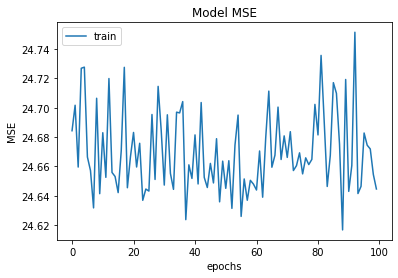

In [88]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model MSE')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [80]:
#Prediction on test data

predict_yhat = model.predict(X_test_norm)

In [81]:

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predict_yhat)
mse

240.64137803146687

In [89]:
mse_total = []

for i in range(50):
    
    print('\nIteration: ', i+1)
    model.fit(X_train_norm, y_train, validation_split=0.2, epochs=100)
    predict_yhat = model.predict(X_test_norm)
    mse = mean_squared_error(y_test, predict_yhat)
    print('\n''Mean Squared Error for iteration{}: {}'.format(i+1, mse))
    mse_total.append(mse)


Iteration:  1
Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 0s 155us/step - loss: 24.6655 - val_loss: 47.0396
Epoch 2/100
576/576 [==============================] - 0s 97us/step - loss: 24.6715 - val_loss: 46.8948
Epoch 3/100
576/576 [==============================] - 0s 95us/step - loss: 24.6449 - val_loss: 47.0024
Epoch 4/100
576/576 [==============================] - 0s 113us/step - loss: 24.6523 - val_loss: 47.0494
Epoch 5/100
576/576 [==============================] - 0s 96us/step - loss: 24.6662 - val_loss: 46.9376
Epoch 6/100
576/576 [==============================] - 0s 91us/step - loss: 24.6417 - val_loss: 47.0128
Epoch 7/100
576/576 [==============================] - 0s 88us/step - loss: 24.6835 - val_loss: 46.9409
Epoch 8/100
576/576 [==============================] - 0s 88us/step - loss: 24.6954 - val_loss: 47.1339
Epoch 9/100
576/576 [==============================] - 0s 99us/step - loss: 24.6408 - val_loss: 46.9945
E

Epoch 78/100
576/576 [==============================] - 0s 92us/step - loss: 24.6203 - val_loss: 46.9334
Epoch 79/100
576/576 [==============================] - 0s 78us/step - loss: 24.6149 - val_loss: 47.0395
Epoch 80/100
576/576 [==============================] - 0s 72us/step - loss: 24.6358 - val_loss: 46.9885
Epoch 81/100
576/576 [==============================] - 0s 97us/step - loss: 24.6208 - val_loss: 46.9756
Epoch 82/100
576/576 [==============================] - 0s 86us/step - loss: 24.6506 - val_loss: 47.0490
Epoch 83/100
576/576 [==============================] - 0s 116us/step - loss: 24.6667 - val_loss: 46.9968
Epoch 84/100
576/576 [==============================] - 0s 285us/step - loss: 24.6416 - val_loss: 47.0270
Epoch 85/100
576/576 [==============================] - 0s 390us/step - loss: 24.6379 - val_loss: 47.0487
Epoch 86/100
576/576 [==============================] - 0s 124us/step - loss: 24.6290 - val_loss: 46.8707
Epoch 87/100
576/576 [=============================

Epoch 55/100
576/576 [==============================] - 0s 86us/step - loss: 24.6245 - val_loss: 46.9876
Epoch 56/100
576/576 [==============================] - 0s 70us/step - loss: 24.6317 - val_loss: 47.1110
Epoch 57/100
576/576 [==============================] - 0s 74us/step - loss: 24.6244 - val_loss: 47.0135
Epoch 58/100
576/576 [==============================] - 0s 71us/step - loss: 24.6891 - val_loss: 47.1869
Epoch 59/100
576/576 [==============================] - 0s 73us/step - loss: 24.5986 - val_loss: 46.9841
Epoch 60/100
576/576 [==============================] - 0s 72us/step - loss: 24.6383 - val_loss: 46.9456
Epoch 61/100
576/576 [==============================] - 0s 71us/step - loss: 24.6354 - val_loss: 47.1325
Epoch 62/100
576/576 [==============================] - 0s 73us/step - loss: 24.6149 - val_loss: 47.0432
Epoch 63/100
576/576 [==============================] - 0s 71us/step - loss: 24.6328 - val_loss: 47.0648
Epoch 64/100
576/576 [==============================] -

576/576 [==============================] - 0s 78us/step - loss: 24.6169 - val_loss: 46.9537
Epoch 32/100
576/576 [==============================] - 0s 72us/step - loss: 24.6151 - val_loss: 47.0494
Epoch 33/100
576/576 [==============================] - 0s 75us/step - loss: 24.6587 - val_loss: 47.1624
Epoch 34/100
576/576 [==============================] - 0s 83us/step - loss: 24.6934 - val_loss: 46.9760
Epoch 35/100
576/576 [==============================] - 0s 86us/step - loss: 24.5993 - val_loss: 47.1201
Epoch 36/100
576/576 [==============================] - 0s 89us/step - loss: 24.6432 - val_loss: 47.1742
Epoch 37/100
576/576 [==============================] - 0s 89us/step - loss: 24.5857 - val_loss: 47.0502
Epoch 38/100
576/576 [==============================] - 0s 78us/step - loss: 24.5986 - val_loss: 47.0565
Epoch 39/100
576/576 [==============================] - 0s 118us/step - loss: 24.5880 - val_loss: 46.9889
Epoch 40/100
576/576 [==============================] - 0s 79us/ste

576/576 [==============================] - 0s 88us/step - loss: 24.5975 - val_loss: 47.0621
Epoch 9/100
576/576 [==============================] - 0s 76us/step - loss: 24.5820 - val_loss: 47.0707
Epoch 10/100
576/576 [==============================] - 0s 70us/step - loss: 24.6479 - val_loss: 47.2395
Epoch 11/100
576/576 [==============================] - 0s 261us/step - loss: 24.6154 - val_loss: 47.0175
Epoch 12/100
576/576 [==============================] - 0s 265us/step - loss: 24.6353 - val_loss: 47.0026
Epoch 13/100
576/576 [==============================] - 0s 101us/step - loss: 24.5820 - val_loss: 47.0373
Epoch 14/100
576/576 [==============================] - 0s 83us/step - loss: 24.6096 - val_loss: 47.0900
Epoch 15/100
576/576 [==============================] - 0s 105us/step - loss: 24.6224 - val_loss: 46.9521
Epoch 16/100
576/576 [==============================] - 0s 81us/step - loss: 24.5767 - val_loss: 47.0929
Epoch 17/100
576/576 [==============================] - 0s 72us/s

576/576 [==============================] - 0s 88us/step - loss: 24.6255 - val_loss: 47.1405
Epoch 87/100
576/576 [==============================] - 0s 79us/step - loss: 24.5803 - val_loss: 47.0131
Epoch 88/100
576/576 [==============================] - 0s 86us/step - loss: 24.6042 - val_loss: 47.0396
Epoch 89/100
576/576 [==============================] - 0s 73us/step - loss: 24.5853 - val_loss: 47.1418
Epoch 90/100
576/576 [==============================] - 0s 80us/step - loss: 24.6455 - val_loss: 47.1323
Epoch 91/100
576/576 [==============================] - 0s 76us/step - loss: 24.5821 - val_loss: 46.9515
Epoch 92/100
576/576 [==============================] - 0s 76us/step - loss: 24.5861 - val_loss: 47.1449
Epoch 93/100
576/576 [==============================] - 0s 91us/step - loss: 24.5741 - val_loss: 46.9726
Epoch 94/100
576/576 [==============================] - 0s 79us/step - loss: 24.5843 - val_loss: 47.0950
Epoch 95/100
576/576 [==============================] - 0s 76us/step

576/576 [==============================] - 0s 74us/step - loss: 24.6078 - val_loss: 47.2003
Epoch 64/100
576/576 [==============================] - 0s 79us/step - loss: 24.5608 - val_loss: 47.0423
Epoch 65/100
576/576 [==============================] - 0s 70us/step - loss: 24.5683 - val_loss: 46.9886
Epoch 66/100
576/576 [==============================] - 0s 71us/step - loss: 24.5864 - val_loss: 47.1271
Epoch 67/100
576/576 [==============================] - 0s 71us/step - loss: 24.5998 - val_loss: 47.3213
Epoch 68/100
576/576 [==============================] - 0s 71us/step - loss: 24.5810 - val_loss: 47.2095
Epoch 69/100
576/576 [==============================] - 0s 72us/step - loss: 24.5643 - val_loss: 47.0741
Epoch 70/100
576/576 [==============================] - 0s 72us/step - loss: 24.5505 - val_loss: 47.1922
Epoch 71/100
576/576 [==============================] - 0s 75us/step - loss: 24.5639 - val_loss: 47.0346
Epoch 72/100
576/576 [==============================] - 0s 101us/ste

576/576 [==============================] - 0s 74us/step - loss: 24.5416 - val_loss: 47.1647
Epoch 41/100
576/576 [==============================] - 0s 73us/step - loss: 24.5389 - val_loss: 47.2276
Epoch 42/100
576/576 [==============================] - 0s 77us/step - loss: 24.5421 - val_loss: 47.2624
Epoch 43/100
576/576 [==============================] - 0s 72us/step - loss: 24.5819 - val_loss: 47.3088
Epoch 44/100
576/576 [==============================] - 0s 70us/step - loss: 24.5361 - val_loss: 47.2610
Epoch 45/100
576/576 [==============================] - 0s 72us/step - loss: 24.5865 - val_loss: 47.3752
Epoch 46/100
576/576 [==============================] - 0s 72us/step - loss: 24.6089 - val_loss: 47.1018
Epoch 47/100
576/576 [==============================] - 0s 71us/step - loss: 24.5652 - val_loss: 47.3108
Epoch 48/100
576/576 [==============================] - 0s 72us/step - loss: 24.5729 - val_loss: 47.3313
Epoch 49/100
576/576 [==============================] - 0s 71us/step

576/576 [==============================] - 0s 74us/step - loss: 24.5483 - val_loss: 47.2807
Epoch 18/100
576/576 [==============================] - 0s 100us/step - loss: 24.5293 - val_loss: 47.3696
Epoch 19/100
576/576 [==============================] - 0s 76us/step - loss: 24.4996 - val_loss: 47.3269
Epoch 20/100
576/576 [==============================] - 0s 74us/step - loss: 24.5670 - val_loss: 47.2469
Epoch 21/100
576/576 [==============================] - 0s 72us/step - loss: 24.5298 - val_loss: 47.3713
Epoch 22/100
576/576 [==============================] - 0s 72us/step - loss: 24.5233 - val_loss: 47.3328
Epoch 23/100
576/576 [==============================] - 0s 71us/step - loss: 24.5439 - val_loss: 47.3750
Epoch 24/100
576/576 [==============================] - 0s 71us/step - loss: 24.5275 - val_loss: 47.2306
Epoch 25/100
576/576 [==============================] - 0s 71us/step - loss: 24.5225 - val_loss: 47.3115
Epoch 26/100
576/576 [==============================] - 0s 70us/ste

576/576 [==============================] - 0s 78us/step - loss: 24.5247 - val_loss: 47.3563
Epoch 96/100
576/576 [==============================] - 0s 75us/step - loss: 24.4997 - val_loss: 47.3269
Epoch 97/100
576/576 [==============================] - 0s 106us/step - loss: 24.5743 - val_loss: 47.1854
Epoch 98/100
576/576 [==============================] - 0s 72us/step - loss: 24.5047 - val_loss: 47.3652
Epoch 99/100
576/576 [==============================] - 0s 71us/step - loss: 24.5411 - val_loss: 47.4185
Epoch 100/100
576/576 [==============================] - 0s 73us/step - loss: 24.5253 - val_loss: 47.2804

Mean Squared Error for iteration7: 45.391878715573064

Iteration:  8
Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 0s 77us/step - loss: 24.5518 - val_loss: 47.3828
Epoch 2/100
576/576 [==============================] - 0s 76us/step - loss: 24.5207 - val_loss: 47.4130
Epoch 3/100
576/576 [==============================] - 0s

576/576 [==============================] - 0s 73us/step - loss: 24.5514 - val_loss: 47.3277
Epoch 73/100
576/576 [==============================] - 0s 71us/step - loss: 24.5313 - val_loss: 47.4546
Epoch 74/100
576/576 [==============================] - 0s 70us/step - loss: 24.5295 - val_loss: 47.2157
Epoch 75/100
576/576 [==============================] - 0s 90us/step - loss: 24.5129 - val_loss: 47.4243
Epoch 76/100
576/576 [==============================] - 0s 71us/step - loss: 24.5024 - val_loss: 47.5014
Epoch 77/100
576/576 [==============================] - 0s 71us/step - loss: 24.5205 - val_loss: 47.2832
Epoch 78/100
576/576 [==============================] - 0s 71us/step - loss: 24.4987 - val_loss: 47.3878
Epoch 79/100
576/576 [==============================] - 0s 72us/step - loss: 24.4920 - val_loss: 47.4060
Epoch 80/100
576/576 [==============================] - 0s 71us/step - loss: 24.4934 - val_loss: 47.4312
Epoch 81/100
576/576 [==============================] - 0s 70us/step

576/576 [==============================] - 0s 72us/step - loss: 24.4997 - val_loss: 47.3792
Epoch 50/100
576/576 [==============================] - 0s 73us/step - loss: 24.5082 - val_loss: 47.4191
Epoch 51/100
576/576 [==============================] - 0s 70us/step - loss: 24.4986 - val_loss: 47.3323
Epoch 52/100
576/576 [==============================] - 0s 77us/step - loss: 24.6305 - val_loss: 47.6173
Epoch 53/100
576/576 [==============================] - 0s 71us/step - loss: 24.5225 - val_loss: 47.2313
Epoch 54/100
576/576 [==============================] - 0s 72us/step - loss: 24.5378 - val_loss: 47.3996
Epoch 55/100
576/576 [==============================] - 0s 84us/step - loss: 24.5157 - val_loss: 47.3412
Epoch 56/100
576/576 [==============================] - 0s 70us/step - loss: 24.5226 - val_loss: 47.4419
Epoch 57/100
576/576 [==============================] - 0s 72us/step - loss: 24.5652 - val_loss: 47.3170
Epoch 58/100
576/576 [==============================] - 0s 71us/step

576/576 [==============================] - 0s 76us/step - loss: 24.5244 - val_loss: 47.5055
Epoch 27/100
576/576 [==============================] - 0s 72us/step - loss: 24.5148 - val_loss: 47.4370
Epoch 28/100
576/576 [==============================] - 0s 77us/step - loss: 24.4889 - val_loss: 47.3413
Epoch 29/100
576/576 [==============================] - 0s 70us/step - loss: 24.5100 - val_loss: 47.5300
Epoch 30/100
576/576 [==============================] - 0s 69us/step - loss: 24.4789 - val_loss: 47.4165
Epoch 31/100
576/576 [==============================] - 0s 70us/step - loss: 24.4828 - val_loss: 47.4995
Epoch 32/100
576/576 [==============================] - 0s 73us/step - loss: 24.5389 - val_loss: 47.4097
Epoch 33/100
576/576 [==============================] - 0s 71us/step - loss: 24.4863 - val_loss: 47.3629
Epoch 34/100
576/576 [==============================] - 0s 85us/step - loss: 24.5050 - val_loss: 47.3297
Epoch 35/100
576/576 [==============================] - 0s 75us/step

576/576 [==============================] - 0s 73us/step - loss: 24.5104 - val_loss: 47.2293
Epoch 4/100
576/576 [==============================] - 0s 71us/step - loss: 24.4675 - val_loss: 47.4637
Epoch 5/100
576/576 [==============================] - 0s 70us/step - loss: 24.5102 - val_loss: 47.2839
Epoch 6/100
576/576 [==============================] - 0s 71us/step - loss: 24.4637 - val_loss: 47.4361
Epoch 7/100
576/576 [==============================] - 0s 73us/step - loss: 24.5032 - val_loss: 47.4214
Epoch 8/100
576/576 [==============================] - 0s 82us/step - loss: 24.5142 - val_loss: 47.3559
Epoch 9/100
576/576 [==============================] - 0s 71us/step - loss: 24.4714 - val_loss: 47.3570
Epoch 10/100
576/576 [==============================] - 0s 72us/step - loss: 24.5055 - val_loss: 47.4150
Epoch 11/100
576/576 [==============================] - 0s 72us/step - loss: 24.4717 - val_loss: 47.4065
Epoch 12/100
576/576 [==============================] - 0s 76us/step - los

576/576 [==============================] - 0s 80us/step - loss: 24.5274 - val_loss: 47.3847
Epoch 82/100
576/576 [==============================] - 0s 83us/step - loss: 24.4434 - val_loss: 47.4509
Epoch 83/100
576/576 [==============================] - 0s 72us/step - loss: 24.4911 - val_loss: 47.4976
Epoch 84/100
576/576 [==============================] - 0s 72us/step - loss: 24.4606 - val_loss: 47.2066
Epoch 85/100
576/576 [==============================] - 0s 72us/step - loss: 24.4593 - val_loss: 47.4326
Epoch 86/100
576/576 [==============================] - 0s 71us/step - loss: 24.5035 - val_loss: 47.4173
Epoch 87/100
576/576 [==============================] - 0s 76us/step - loss: 24.4469 - val_loss: 47.4372
Epoch 88/100
576/576 [==============================] - 0s 73us/step - loss: 24.4923 - val_loss: 47.3428
Epoch 89/100
576/576 [==============================] - 0s 69us/step - loss: 24.4661 - val_loss: 47.3316
Epoch 90/100
576/576 [==============================] - 0s 87us/step

576/576 [==============================] - 0s 73us/step - loss: 24.4263 - val_loss: 47.3542
Epoch 59/100
576/576 [==============================] - 0s 70us/step - loss: 24.4625 - val_loss: 47.4572
Epoch 60/100
576/576 [==============================] - 0s 72us/step - loss: 24.4369 - val_loss: 47.4239
Epoch 61/100
576/576 [==============================] - 0s 77us/step - loss: 24.4525 - val_loss: 47.4397
Epoch 62/100
576/576 [==============================] - 0s 71us/step - loss: 24.4328 - val_loss: 47.4934
Epoch 63/100
576/576 [==============================] - 0s 72us/step - loss: 24.4514 - val_loss: 47.3516
Epoch 64/100
576/576 [==============================] - 0s 72us/step - loss: 24.4662 - val_loss: 47.3834
Epoch 65/100
576/576 [==============================] - 0s 71us/step - loss: 24.4673 - val_loss: 47.4230
Epoch 66/100
576/576 [==============================] - 0s 71us/step - loss: 24.4805 - val_loss: 47.3925
Epoch 67/100
576/576 [==============================] - 0s 72us/step

576/576 [==============================] - 0s 71us/step - loss: 24.4181 - val_loss: 47.4239
Epoch 36/100
576/576 [==============================] - 0s 70us/step - loss: 24.4764 - val_loss: 47.4477
Epoch 37/100
576/576 [==============================] - 0s 83us/step - loss: 24.4719 - val_loss: 47.5425
Epoch 38/100
576/576 [==============================] - 0s 89us/step - loss: 24.4408 - val_loss: 47.3754
Epoch 39/100
576/576 [==============================] - 0s 75us/step - loss: 24.4608 - val_loss: 47.3698
Epoch 40/100
576/576 [==============================] - 0s 72us/step - loss: 24.4743 - val_loss: 47.4178
Epoch 41/100
576/576 [==============================] - 0s 71us/step - loss: 24.4323 - val_loss: 47.4393
Epoch 42/100
576/576 [==============================] - 0s 71us/step - loss: 24.4188 - val_loss: 47.4939
Epoch 43/100
576/576 [==============================] - 0s 72us/step - loss: 24.4780 - val_loss: 47.5448
Epoch 44/100
576/576 [==============================] - 0s 70us/step

576/576 [==============================] - 0s 77us/step - loss: 24.4465 - val_loss: 47.3152
Epoch 13/100
576/576 [==============================] - 0s 73us/step - loss: 24.4558 - val_loss: 47.3426
Epoch 14/100
576/576 [==============================] - 0s 71us/step - loss: 24.4273 - val_loss: 47.2648
Epoch 15/100
576/576 [==============================] - 0s 72us/step - loss: 24.4858 - val_loss: 47.4061
Epoch 16/100
576/576 [==============================] - 0s 70us/step - loss: 24.3799 - val_loss: 47.2471
Epoch 17/100
576/576 [==============================] - 0s 86us/step - loss: 24.4042 - val_loss: 47.2337
Epoch 18/100
576/576 [==============================] - 0s 76us/step - loss: 24.4163 - val_loss: 47.2712
Epoch 19/100
576/576 [==============================] - 0s 71us/step - loss: 24.4221 - val_loss: 47.2884
Epoch 20/100
576/576 [==============================] - 0s 71us/step - loss: 24.4091 - val_loss: 47.2626
Epoch 21/100
576/576 [==============================] - 0s 72us/step

576/576 [==============================] - 0s 74us/step - loss: 24.4589 - val_loss: 47.2259
Epoch 91/100
576/576 [==============================] - 0s 73us/step - loss: 24.4418 - val_loss: 47.2769
Epoch 92/100
576/576 [==============================] - 0s 76us/step - loss: 24.4223 - val_loss: 47.3064
Epoch 93/100
576/576 [==============================] - 0s 80us/step - loss: 24.3884 - val_loss: 47.3092
Epoch 94/100
576/576 [==============================] - 0s 76us/step - loss: 24.4579 - val_loss: 47.1661
Epoch 95/100
576/576 [==============================] - 0s 75us/step - loss: 24.3853 - val_loss: 47.2709
Epoch 96/100
576/576 [==============================] - 0s 70us/step - loss: 24.4444 - val_loss: 47.3790
Epoch 97/100
576/576 [==============================] - 0s 75us/step - loss: 24.3898 - val_loss: 47.2209
Epoch 98/100
576/576 [==============================] - 0s 70us/step - loss: 24.4143 - val_loss: 47.2183
Epoch 99/100
576/576 [==============================] - 0s 71us/step

576/576 [==============================] - 0s 77us/step - loss: 24.4069 - val_loss: 47.3031
Epoch 68/100
576/576 [==============================] - 0s 72us/step - loss: 24.3866 - val_loss: 47.2521
Epoch 69/100
576/576 [==============================] - 0s 71us/step - loss: 24.3928 - val_loss: 47.1957
Epoch 70/100
576/576 [==============================] - 0s 71us/step - loss: 24.3910 - val_loss: 47.2744
Epoch 71/100
576/576 [==============================] - 0s 71us/step - loss: 24.3885 - val_loss: 47.2062
Epoch 72/100
576/576 [==============================] - 0s 70us/step - loss: 24.3840 - val_loss: 47.2178
Epoch 73/100
576/576 [==============================] - 0s 70us/step - loss: 24.3696 - val_loss: 47.1724
Epoch 74/100
576/576 [==============================] - 0s 72us/step - loss: 24.4435 - val_loss: 47.2526
Epoch 75/100
576/576 [==============================] - 0s 70us/step - loss: 24.4011 - val_loss: 47.1320
Epoch 76/100
576/576 [==============================] - 0s 71us/step

576/576 [==============================] - 0s 74us/step - loss: 24.3932 - val_loss: 47.1392
Epoch 45/100
576/576 [==============================] - 0s 76us/step - loss: 24.4125 - val_loss: 47.2177
Epoch 46/100
576/576 [==============================] - 0s 95us/step - loss: 24.3847 - val_loss: 47.2016
Epoch 47/100
576/576 [==============================] - 0s 85us/step - loss: 24.3702 - val_loss: 47.1965
Epoch 48/100
576/576 [==============================] - 0s 72us/step - loss: 24.3799 - val_loss: 47.1794
Epoch 49/100
576/576 [==============================] - 0s 73us/step - loss: 24.3518 - val_loss: 47.0818
Epoch 50/100
576/576 [==============================] - 0s 73us/step - loss: 24.3663 - val_loss: 47.1931
Epoch 51/100
576/576 [==============================] - 0s 73us/step - loss: 24.4414 - val_loss: 47.2299
Epoch 52/100
576/576 [==============================] - 0s 76us/step - loss: 24.3730 - val_loss: 47.1686
Epoch 53/100
576/576 [==============================] - 0s 69us/step

576/576 [==============================] - 0s 78us/step - loss: 24.3636 - val_loss: 47.1657
Epoch 22/100
576/576 [==============================] - 0s 73us/step - loss: 24.4028 - val_loss: 47.2055
Epoch 23/100
576/576 [==============================] - 0s 71us/step - loss: 24.3739 - val_loss: 47.1423
Epoch 24/100
576/576 [==============================] - 0s 88us/step - loss: 24.4179 - val_loss: 47.1201
Epoch 25/100
576/576 [==============================] - 0s 76us/step - loss: 24.3828 - val_loss: 47.3468
Epoch 26/100
576/576 [==============================] - 0s 71us/step - loss: 24.3475 - val_loss: 47.1940
Epoch 27/100
576/576 [==============================] - 0s 70us/step - loss: 24.3551 - val_loss: 47.2090
Epoch 28/100
576/576 [==============================] - 0s 72us/step - loss: 24.3468 - val_loss: 47.1316
Epoch 29/100
576/576 [==============================] - 0s 70us/step - loss: 24.3728 - val_loss: 47.2190
Epoch 30/100
576/576 [==============================] - 0s 73us/step

576/576 [==============================] - 0s 71us/step - loss: 24.3901 - val_loss: 47.1675
Epoch 100/100
576/576 [==============================] - 0s 71us/step - loss: 24.3475 - val_loss: 47.1227

Mean Squared Error for iteration17: 44.90347959329814

Iteration:  18
Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 0s 72us/step - loss: 24.3713 - val_loss: 47.1056
Epoch 2/100
576/576 [==============================] - 0s 76us/step - loss: 24.3556 - val_loss: 47.0700
Epoch 3/100
576/576 [==============================] - 0s 71us/step - loss: 24.3582 - val_loss: 47.0715
Epoch 4/100
576/576 [==============================] - 0s 79us/step - loss: 24.3762 - val_loss: 47.3119
Epoch 5/100
576/576 [==============================] - 0s 72us/step - loss: 24.3507 - val_loss: 47.2240
Epoch 6/100
576/576 [==============================] - 0s 73us/step - loss: 24.3663 - val_loss: 47.1085
Epoch 7/100
576/576 [==============================] - 0s 71u

576/576 [==============================] - 0s 81us/step - loss: 24.3352 - val_loss: 47.0949
Epoch 77/100
576/576 [==============================] - 0s 71us/step - loss: 24.3430 - val_loss: 47.1797
Epoch 78/100
576/576 [==============================] - 0s 70us/step - loss: 24.3428 - val_loss: 47.1011
Epoch 79/100
576/576 [==============================] - 0s 72us/step - loss: 24.3641 - val_loss: 47.1886
Epoch 80/100
576/576 [==============================] - 0s 90us/step - loss: 24.3638 - val_loss: 46.9910
Epoch 81/100
576/576 [==============================] - 0s 76us/step - loss: 24.3465 - val_loss: 47.0217
Epoch 82/100
576/576 [==============================] - 0s 76us/step - loss: 24.3708 - val_loss: 47.2075
Epoch 83/100
576/576 [==============================] - 0s 71us/step - loss: 24.3510 - val_loss: 47.1486
Epoch 84/100
576/576 [==============================] - 0s 72us/step - loss: 24.3747 - val_loss: 47.3287
Epoch 85/100
576/576 [==============================] - 0s 76us/step

576/576 [==============================] - 0s 73us/step - loss: 24.3267 - val_loss: 47.2066
Epoch 54/100
576/576 [==============================] - 0s 79us/step - loss: 24.3468 - val_loss: 47.2042
Epoch 55/100
576/576 [==============================] - 0s 71us/step - loss: 24.3415 - val_loss: 47.0495
Epoch 56/100
576/576 [==============================] - 0s 71us/step - loss: 24.3308 - val_loss: 46.9847
Epoch 57/100
576/576 [==============================] - 0s 72us/step - loss: 24.3825 - val_loss: 47.1715
Epoch 58/100
576/576 [==============================] - 0s 70us/step - loss: 24.3767 - val_loss: 47.1578
Epoch 59/100
576/576 [==============================] - 0s 81us/step - loss: 24.3477 - val_loss: 47.0286
Epoch 60/100
576/576 [==============================] - 0s 99us/step - loss: 24.3283 - val_loss: 47.2296
Epoch 61/100
576/576 [==============================] - 0s 79us/step - loss: 24.3720 - val_loss: 47.1867
Epoch 62/100
576/576 [==============================] - 0s 75us/step

576/576 [==============================] - 0s 80us/step - loss: 24.3239 - val_loss: 47.0441
Epoch 31/100
576/576 [==============================] - 0s 77us/step - loss: 24.3018 - val_loss: 47.2246
Epoch 32/100
576/576 [==============================] - 0s 75us/step - loss: 24.3417 - val_loss: 47.1911
Epoch 33/100
576/576 [==============================] - 0s 71us/step - loss: 24.3183 - val_loss: 47.0738
Epoch 34/100
576/576 [==============================] - 0s 74us/step - loss: 24.3150 - val_loss: 47.0462
Epoch 35/100
576/576 [==============================] - 0s 76us/step - loss: 24.3460 - val_loss: 47.1918
Epoch 36/100
576/576 [==============================] - 0s 83us/step - loss: 24.3418 - val_loss: 47.1788
Epoch 37/100
576/576 [==============================] - 0s 77us/step - loss: 24.3221 - val_loss: 46.9967
Epoch 38/100
576/576 [==============================] - 0s 73us/step - loss: 24.3149 - val_loss: 47.0494
Epoch 39/100
576/576 [==============================] - 0s 71us/step

576/576 [==============================] - 0s 72us/step - loss: 24.3735 - val_loss: 46.8748
Epoch 8/100
576/576 [==============================] - 0s 77us/step - loss: 24.3447 - val_loss: 47.0126
Epoch 9/100
576/576 [==============================] - 0s 72us/step - loss: 24.3772 - val_loss: 47.2511
Epoch 10/100
576/576 [==============================] - 0s 72us/step - loss: 24.3080 - val_loss: 47.2149
Epoch 11/100
576/576 [==============================] - 0s 71us/step - loss: 24.3387 - val_loss: 47.0331
Epoch 12/100
576/576 [==============================] - 0s 71us/step - loss: 24.3396 - val_loss: 47.1614
Epoch 13/100
576/576 [==============================] - 0s 72us/step - loss: 24.2998 - val_loss: 47.2048
Epoch 14/100
576/576 [==============================] - 0s 71us/step - loss: 24.3195 - val_loss: 47.1027
Epoch 15/100
576/576 [==============================] - 0s 76us/step - loss: 24.3169 - val_loss: 47.1435
Epoch 16/100
576/576 [==============================] - 0s 71us/step -

576/576 [==============================] - 0s 76us/step - loss: 24.3218 - val_loss: 47.1096
Epoch 86/100
576/576 [==============================] - 0s 72us/step - loss: 24.2825 - val_loss: 47.0133
Epoch 87/100
576/576 [==============================] - 0s 77us/step - loss: 24.3577 - val_loss: 47.0614
Epoch 88/100
576/576 [==============================] - 0s 74us/step - loss: 24.3818 - val_loss: 47.2931
Epoch 89/100
576/576 [==============================] - 0s 71us/step - loss: 24.2744 - val_loss: 47.0744
Epoch 90/100
576/576 [==============================] - 0s 73us/step - loss: 24.3183 - val_loss: 46.9249
Epoch 91/100
576/576 [==============================] - 0s 71us/step - loss: 24.2951 - val_loss: 47.0214
Epoch 92/100
576/576 [==============================] - 0s 71us/step - loss: 24.2914 - val_loss: 47.1499
Epoch 93/100
576/576 [==============================] - 0s 84us/step - loss: 24.3040 - val_loss: 47.1285
Epoch 94/100
576/576 [==============================] - 0s 72us/step

576/576 [==============================] - 0s 73us/step - loss: 24.3327 - val_loss: 47.2096
Epoch 63/100
576/576 [==============================] - 0s 71us/step - loss: 24.2996 - val_loss: 46.9943
Epoch 64/100
576/576 [==============================] - 0s 70us/step - loss: 24.2941 - val_loss: 47.1253
Epoch 65/100
576/576 [==============================] - 0s 71us/step - loss: 24.2853 - val_loss: 47.0514
Epoch 66/100
576/576 [==============================] - 0s 71us/step - loss: 24.2908 - val_loss: 47.0074
Epoch 67/100
576/576 [==============================] - 0s 71us/step - loss: 24.3080 - val_loss: 47.1203
Epoch 68/100
576/576 [==============================] - 0s 71us/step - loss: 24.3305 - val_loss: 47.0429
Epoch 69/100
576/576 [==============================] - 0s 71us/step - loss: 24.3262 - val_loss: 47.0154
Epoch 70/100
576/576 [==============================] - 0s 71us/step - loss: 24.2947 - val_loss: 47.0699
Epoch 71/100
576/576 [==============================] - 0s 71us/step

576/576 [==============================] - 0s 73us/step - loss: 24.3196 - val_loss: 47.2784
Epoch 40/100
576/576 [==============================] - 0s 76us/step - loss: 24.2746 - val_loss: 47.1396
Epoch 41/100
576/576 [==============================] - 0s 71us/step - loss: 24.3120 - val_loss: 47.0011
Epoch 42/100
576/576 [==============================] - 0s 72us/step - loss: 24.2834 - val_loss: 47.0770
Epoch 43/100
576/576 [==============================] - 0s 72us/step - loss: 24.2996 - val_loss: 47.0472
Epoch 44/100
576/576 [==============================] - 0s 73us/step - loss: 24.2864 - val_loss: 47.1585
Epoch 45/100
576/576 [==============================] - 0s 71us/step - loss: 24.2975 - val_loss: 47.0973
Epoch 46/100
576/576 [==============================] - 0s 72us/step - loss: 24.3191 - val_loss: 47.0612
Epoch 47/100
576/576 [==============================] - 0s 75us/step - loss: 24.2839 - val_loss: 46.9371
Epoch 48/100
576/576 [==============================] - 0s 76us/step

576/576 [==============================] - 0s 72us/step - loss: 24.2641 - val_loss: 47.1315
Epoch 17/100
576/576 [==============================] - 0s 72us/step - loss: 24.2710 - val_loss: 47.0778
Epoch 18/100
576/576 [==============================] - 0s 71us/step - loss: 24.2556 - val_loss: 47.0357
Epoch 19/100
576/576 [==============================] - 0s 72us/step - loss: 24.2750 - val_loss: 47.1078
Epoch 20/100
576/576 [==============================] - 0s 84us/step - loss: 24.2620 - val_loss: 47.0320
Epoch 21/100
576/576 [==============================] - 0s 70us/step - loss: 24.2570 - val_loss: 47.1320
Epoch 22/100
576/576 [==============================] - 0s 70us/step - loss: 24.2566 - val_loss: 47.1310
Epoch 23/100
576/576 [==============================] - 0s 71us/step - loss: 24.2388 - val_loss: 47.2900
Epoch 24/100
576/576 [==============================] - 0s 71us/step - loss: 24.2998 - val_loss: 47.0567
Epoch 25/100
576/576 [==============================] - 0s 70us/step

576/576 [==============================] - 0s 74us/step - loss: 24.2486 - val_loss: 47.0568
Epoch 95/100
576/576 [==============================] - 0s 78us/step - loss: 24.2494 - val_loss: 47.1487
Epoch 96/100
576/576 [==============================] - 0s 73us/step - loss: 24.2289 - val_loss: 47.2093
Epoch 97/100
576/576 [==============================] - 0s 74us/step - loss: 24.2434 - val_loss: 47.1091
Epoch 98/100
576/576 [==============================] - 0s 76us/step - loss: 24.2304 - val_loss: 47.0268
Epoch 99/100
576/576 [==============================] - 0s 88us/step - loss: 24.2398 - val_loss: 47.0584
Epoch 100/100
576/576 [==============================] - 0s 81us/step - loss: 24.2411 - val_loss: 47.0746

Mean Squared Error for iteration24: 45.34065175367527

Iteration:  25
Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 0s 76us/step - loss: 24.2418 - val_loss: 47.1438
Epoch 2/100
576/576 [==============================] - 0

576/576 [==============================] - 0s 78us/step - loss: 24.2526 - val_loss: 47.0467
Epoch 72/100
576/576 [==============================] - 0s 75us/step - loss: 24.2537 - val_loss: 46.9754
Epoch 73/100
576/576 [==============================] - 0s 74us/step - loss: 24.2314 - val_loss: 47.0855
Epoch 74/100
576/576 [==============================] - 0s 71us/step - loss: 24.2454 - val_loss: 46.9564
Epoch 75/100
576/576 [==============================] - 0s 71us/step - loss: 24.2176 - val_loss: 46.9948
Epoch 76/100
576/576 [==============================] - 0s 70us/step - loss: 24.2127 - val_loss: 47.1023
Epoch 77/100
576/576 [==============================] - 0s 82us/step - loss: 24.2546 - val_loss: 47.1316
Epoch 78/100
576/576 [==============================] - 0s 70us/step - loss: 24.2108 - val_loss: 47.0994
Epoch 79/100
576/576 [==============================] - 0s 72us/step - loss: 24.2090 - val_loss: 47.0259
Epoch 80/100
576/576 [==============================] - 0s 73us/step

576/576 [==============================] - 0s 74us/step - loss: 24.2694 - val_loss: 47.1366
Epoch 49/100
576/576 [==============================] - 0s 78us/step - loss: 24.2086 - val_loss: 47.0684
Epoch 50/100
576/576 [==============================] - 0s 69us/step - loss: 24.2041 - val_loss: 46.9796
Epoch 51/100
576/576 [==============================] - 0s 74us/step - loss: 24.2695 - val_loss: 47.0729
Epoch 52/100
576/576 [==============================] - 0s 71us/step - loss: 24.2112 - val_loss: 47.1127
Epoch 53/100
576/576 [==============================] - 0s 71us/step - loss: 24.2154 - val_loss: 47.0531
Epoch 54/100
576/576 [==============================] - 0s 71us/step - loss: 24.2330 - val_loss: 47.0290
Epoch 55/100
576/576 [==============================] - 0s 73us/step - loss: 24.2425 - val_loss: 47.1249
Epoch 56/100
576/576 [==============================] - 0s 72us/step - loss: 24.2060 - val_loss: 46.9964
Epoch 57/100
576/576 [==============================] - 0s 74us/step

576/576 [==============================] - 0s 87us/step - loss: 24.2042 - val_loss: 47.1191
Epoch 26/100
576/576 [==============================] - 0s 77us/step - loss: 24.1898 - val_loss: 47.0224
Epoch 27/100
576/576 [==============================] - 0s 84us/step - loss: 24.2178 - val_loss: 46.9026
Epoch 28/100
576/576 [==============================] - 0s 73us/step - loss: 24.2313 - val_loss: 47.0812
Epoch 29/100
576/576 [==============================] - 0s 71us/step - loss: 24.1978 - val_loss: 47.1876
Epoch 30/100
576/576 [==============================] - 0s 71us/step - loss: 24.2047 - val_loss: 47.1641
Epoch 31/100
576/576 [==============================] - 0s 72us/step - loss: 24.3069 - val_loss: 47.1209
Epoch 32/100
576/576 [==============================] - 0s 77us/step - loss: 24.2048 - val_loss: 46.9686
Epoch 33/100
576/576 [==============================] - 0s 73us/step - loss: 24.2269 - val_loss: 46.9126
Epoch 34/100
576/576 [==============================] - 0s 89us/step

576/576 [==============================] - 0s 81us/step - loss: 24.2237 - val_loss: 47.1267
Epoch 3/100
576/576 [==============================] - 0s 72us/step - loss: 24.2015 - val_loss: 47.0548
Epoch 4/100
576/576 [==============================] - 0s 75us/step - loss: 24.2024 - val_loss: 47.0332
Epoch 5/100
576/576 [==============================] - 0s 73us/step - loss: 24.2089 - val_loss: 47.0885
Epoch 6/100
576/576 [==============================] - 0s 73us/step - loss: 24.2250 - val_loss: 47.0256
Epoch 7/100
576/576 [==============================] - 0s 78us/step - loss: 24.2571 - val_loss: 47.1687
Epoch 8/100
576/576 [==============================] - 0s 72us/step - loss: 24.2413 - val_loss: 47.1261
Epoch 9/100
576/576 [==============================] - 0s 71us/step - loss: 24.2350 - val_loss: 47.0370
Epoch 10/100
576/576 [==============================] - 0s 71us/step - loss: 24.1959 - val_loss: 47.0284
Epoch 11/100
576/576 [==============================] - 0s 70us/step - loss

576/576 [==============================] - 0s 73us/step - loss: 24.1814 - val_loss: 47.2029
Epoch 81/100
576/576 [==============================] - 0s 70us/step - loss: 24.1902 - val_loss: 47.0688
Epoch 82/100
576/576 [==============================] - 0s 75us/step - loss: 24.2054 - val_loss: 47.0167
Epoch 83/100
576/576 [==============================] - 0s 71us/step - loss: 24.1914 - val_loss: 47.0747
Epoch 84/100
576/576 [==============================] - 0s 76us/step - loss: 24.2019 - val_loss: 47.1831
Epoch 85/100
576/576 [==============================] - 0s 70us/step - loss: 24.1820 - val_loss: 47.1192
Epoch 86/100
576/576 [==============================] - 0s 72us/step - loss: 24.2077 - val_loss: 46.9064
Epoch 87/100
576/576 [==============================] - 0s 71us/step - loss: 24.2071 - val_loss: 47.1574
Epoch 88/100
576/576 [==============================] - 0s 71us/step - loss: 24.2255 - val_loss: 47.2551
Epoch 89/100
576/576 [==============================] - 0s 73us/step

576/576 [==============================] - 0s 78us/step - loss: 24.1543 - val_loss: 47.0118
Epoch 58/100
576/576 [==============================] - 0s 79us/step - loss: 24.1855 - val_loss: 47.0645
Epoch 59/100
576/576 [==============================] - 0s 71us/step - loss: 24.1998 - val_loss: 46.9789
Epoch 60/100
576/576 [==============================] - 0s 86us/step - loss: 24.2006 - val_loss: 47.0753
Epoch 61/100
576/576 [==============================] - 0s 78us/step - loss: 24.1974 - val_loss: 47.1135
Epoch 62/100
576/576 [==============================] - 0s 70us/step - loss: 24.2029 - val_loss: 47.0126
Epoch 63/100
576/576 [==============================] - 0s 71us/step - loss: 24.1988 - val_loss: 47.1582
Epoch 64/100
576/576 [==============================] - 0s 70us/step - loss: 24.1977 - val_loss: 46.9815
Epoch 65/100
576/576 [==============================] - 0s 70us/step - loss: 24.1859 - val_loss: 47.0456
Epoch 66/100
576/576 [==============================] - 0s 71us/step

576/576 [==============================] - 0s 74us/step - loss: 24.1954 - val_loss: 47.0951
Epoch 35/100
576/576 [==============================] - 0s 72us/step - loss: 24.1929 - val_loss: 46.9994
Epoch 36/100
576/576 [==============================] - 0s 77us/step - loss: 24.1898 - val_loss: 47.0306
Epoch 37/100
576/576 [==============================] - 0s 73us/step - loss: 24.1549 - val_loss: 47.2527
Epoch 38/100
576/576 [==============================] - 0s 72us/step - loss: 24.2152 - val_loss: 47.1037
Epoch 39/100
576/576 [==============================] - 0s 85us/step - loss: 24.2218 - val_loss: 47.1973
Epoch 40/100
576/576 [==============================] - 0s 90us/step - loss: 24.1812 - val_loss: 47.1092
Epoch 41/100
576/576 [==============================] - 0s 75us/step - loss: 24.1598 - val_loss: 47.0465
Epoch 42/100
576/576 [==============================] - 0s 73us/step - loss: 24.1493 - val_loss: 46.9477
Epoch 43/100
576/576 [==============================] - 0s 73us/step

576/576 [==============================] - 0s 78us/step - loss: 24.1781 - val_loss: 46.9711
Epoch 12/100
576/576 [==============================] - 0s 71us/step - loss: 24.1823 - val_loss: 46.9222
Epoch 13/100
576/576 [==============================] - 0s 74us/step - loss: 24.1560 - val_loss: 47.1233
Epoch 14/100
576/576 [==============================] - 0s 75us/step - loss: 24.2228 - val_loss: 47.2765
Epoch 15/100
576/576 [==============================] - 0s 72us/step - loss: 24.1664 - val_loss: 47.0037
Epoch 16/100
576/576 [==============================] - 0s 70us/step - loss: 24.1879 - val_loss: 47.0239
Epoch 17/100
576/576 [==============================] - 0s 85us/step - loss: 24.1670 - val_loss: 47.0254
Epoch 18/100
576/576 [==============================] - 0s 73us/step - loss: 24.1974 - val_loss: 47.1761
Epoch 19/100
576/576 [==============================] - 0s 72us/step - loss: 24.1809 - val_loss: 46.8588
Epoch 20/100
576/576 [==============================] - 0s 72us/step

576/576 [==============================] - 0s 73us/step - loss: 24.2092 - val_loss: 47.0216
Epoch 90/100
576/576 [==============================] - 0s 70us/step - loss: 24.1575 - val_loss: 46.9529
Epoch 91/100
576/576 [==============================] - 0s 71us/step - loss: 24.1670 - val_loss: 46.9993
Epoch 92/100
576/576 [==============================] - 0s 71us/step - loss: 24.1541 - val_loss: 47.0541
Epoch 93/100
576/576 [==============================] - 0s 71us/step - loss: 24.1599 - val_loss: 47.0986
Epoch 94/100
576/576 [==============================] - 0s 72us/step - loss: 24.1809 - val_loss: 46.8933
Epoch 95/100
576/576 [==============================] - 0s 71us/step - loss: 24.1320 - val_loss: 46.9859
Epoch 96/100
576/576 [==============================] - 0s 76us/step - loss: 24.1805 - val_loss: 47.0793
Epoch 97/100
576/576 [==============================] - 0s 72us/step - loss: 24.1503 - val_loss: 46.9718
Epoch 98/100
576/576 [==============================] - 0s 72us/step

576/576 [==============================] - 0s 80us/step - loss: 24.1633 - val_loss: 47.0484
Epoch 67/100
576/576 [==============================] - 0s 81us/step - loss: 24.1528 - val_loss: 46.9074
Epoch 68/100
576/576 [==============================] - 0s 74us/step - loss: 24.1388 - val_loss: 46.9883
Epoch 69/100
576/576 [==============================] - 0s 74us/step - loss: 24.1598 - val_loss: 47.0418
Epoch 70/100
576/576 [==============================] - 0s 77us/step - loss: 24.1472 - val_loss: 47.1031
Epoch 71/100
576/576 [==============================] - 0s 73us/step - loss: 24.1703 - val_loss: 47.0700
Epoch 72/100
576/576 [==============================] - 0s 71us/step - loss: 24.1928 - val_loss: 47.0109
Epoch 73/100
576/576 [==============================] - 0s 71us/step - loss: 24.1779 - val_loss: 47.1146
Epoch 74/100
576/576 [==============================] - 0s 83us/step - loss: 24.1681 - val_loss: 46.9905
Epoch 75/100
576/576 [==============================] - 0s 72us/step

576/576 [==============================] - 0s 74us/step - loss: 24.1762 - val_loss: 47.1183
Epoch 44/100
576/576 [==============================] - 0s 73us/step - loss: 24.1375 - val_loss: 47.0418
Epoch 45/100
576/576 [==============================] - 0s 73us/step - loss: 24.1322 - val_loss: 46.9113
Epoch 46/100
576/576 [==============================] - 0s 77us/step - loss: 24.1572 - val_loss: 46.9059
Epoch 47/100
576/576 [==============================] - 0s 73us/step - loss: 24.1150 - val_loss: 46.9639
Epoch 48/100
576/576 [==============================] - 0s 71us/step - loss: 24.1369 - val_loss: 46.9627
Epoch 49/100
576/576 [==============================] - 0s 75us/step - loss: 24.1892 - val_loss: 47.1202
Epoch 50/100
576/576 [==============================] - 0s 72us/step - loss: 24.1074 - val_loss: 46.9785
Epoch 51/100
576/576 [==============================] - 0s 78us/step - loss: 24.1646 - val_loss: 46.8960
Epoch 52/100
576/576 [==============================] - 0s 73us/step

576/576 [==============================] - 0s 75us/step - loss: 24.1519 - val_loss: 46.9010
Epoch 21/100
576/576 [==============================] - 0s 74us/step - loss: 24.1706 - val_loss: 47.0342
Epoch 22/100
576/576 [==============================] - 0s 72us/step - loss: 24.1536 - val_loss: 46.9861
Epoch 23/100
576/576 [==============================] - 0s 73us/step - loss: 24.1637 - val_loss: 46.8603
Epoch 24/100
576/576 [==============================] - 0s 71us/step - loss: 24.1485 - val_loss: 47.0405
Epoch 25/100
576/576 [==============================] - 0s 71us/step - loss: 24.1692 - val_loss: 46.7763
Epoch 26/100
576/576 [==============================] - 0s 77us/step - loss: 24.1282 - val_loss: 46.9906
Epoch 27/100
576/576 [==============================] - 0s 73us/step - loss: 24.1424 - val_loss: 47.0194
Epoch 28/100
576/576 [==============================] - 0s 72us/step - loss: 24.1413 - val_loss: 46.8673
Epoch 29/100
576/576 [==============================] - 0s 72us/step

576/576 [==============================] - 0s 74us/step - loss: 24.1403 - val_loss: 46.9935
Epoch 99/100
576/576 [==============================] - 0s 77us/step - loss: 24.1400 - val_loss: 46.8867
Epoch 100/100
576/576 [==============================] - 0s 72us/step - loss: 24.1398 - val_loss: 46.9722

Mean Squared Error for iteration34: 45.27829554371088

Iteration:  35
Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 0s 73us/step - loss: 24.1743 - val_loss: 46.7420
Epoch 2/100
576/576 [==============================] - 0s 72us/step - loss: 24.1373 - val_loss: 46.8851
Epoch 3/100
576/576 [==============================] - 0s 77us/step - loss: 24.1626 - val_loss: 47.0029
Epoch 4/100
576/576 [==============================] - 0s 72us/step - loss: 24.1201 - val_loss: 46.8731
Epoch 5/100
576/576 [==============================] - 0s 73us/step - loss: 24.1084 - val_loss: 46.8495
Epoch 6/100
576/576 [==============================] - 0s 71

576/576 [==============================] - 0s 73us/step - loss: 24.1134 - val_loss: 46.8680
Epoch 76/100
576/576 [==============================] - 0s 95us/step - loss: 24.1175 - val_loss: 46.8139
Epoch 77/100
576/576 [==============================] - 0s 78us/step - loss: 24.1114 - val_loss: 46.7654
Epoch 78/100
576/576 [==============================] - 0s 72us/step - loss: 24.1657 - val_loss: 46.8564
Epoch 79/100
576/576 [==============================] - 0s 78us/step - loss: 24.1605 - val_loss: 46.9923
Epoch 80/100
576/576 [==============================] - 0s 73us/step - loss: 24.1279 - val_loss: 46.8950
Epoch 81/100
576/576 [==============================] - 0s 72us/step - loss: 24.1250 - val_loss: 46.9456
Epoch 82/100
576/576 [==============================] - 0s 72us/step - loss: 24.1134 - val_loss: 46.8321
Epoch 83/100
576/576 [==============================] - 0s 72us/step - loss: 24.1859 - val_loss: 46.7872
Epoch 84/100
576/576 [==============================] - 0s 71us/step

576/576 [==============================] - 0s 85us/step - loss: 24.1713 - val_loss: 46.9638
Epoch 53/100
576/576 [==============================] - 0s 71us/step - loss: 24.1063 - val_loss: 46.7966
Epoch 54/100
576/576 [==============================] - 0s 78us/step - loss: 24.1229 - val_loss: 46.6939
Epoch 55/100
576/576 [==============================] - 0s 71us/step - loss: 24.1221 - val_loss: 46.9100
Epoch 56/100
576/576 [==============================] - 0s 73us/step - loss: 24.1135 - val_loss: 46.7910
Epoch 57/100
576/576 [==============================] - 0s 71us/step - loss: 24.1384 - val_loss: 46.8183
Epoch 58/100
576/576 [==============================] - 0s 72us/step - loss: 24.1336 - val_loss: 46.6805
Epoch 59/100
576/576 [==============================] - 0s 72us/step - loss: 24.0994 - val_loss: 46.8302
Epoch 60/100
576/576 [==============================] - 0s 75us/step - loss: 24.1780 - val_loss: 46.8384
Epoch 61/100
576/576 [==============================] - 0s 77us/step

576/576 [==============================] - 0s 71us/step - loss: 24.1196 - val_loss: 46.7442
Epoch 30/100
576/576 [==============================] - 0s 73us/step - loss: 24.1530 - val_loss: 46.8309
Epoch 31/100
576/576 [==============================] - 0s 81us/step - loss: 24.1122 - val_loss: 46.7181
Epoch 32/100
576/576 [==============================] - 0s 72us/step - loss: 24.1044 - val_loss: 46.7107
Epoch 33/100
576/576 [==============================] - 0s 71us/step - loss: 24.1136 - val_loss: 46.7558
Epoch 34/100
576/576 [==============================] - 0s 77us/step - loss: 24.1038 - val_loss: 46.8800
Epoch 35/100
576/576 [==============================] - 0s 75us/step - loss: 24.1067 - val_loss: 46.8346
Epoch 36/100
576/576 [==============================] - 0s 73us/step - loss: 24.1363 - val_loss: 46.9242
Epoch 37/100
576/576 [==============================] - 0s 78us/step - loss: 24.1636 - val_loss: 46.8712
Epoch 38/100
576/576 [==============================] - 0s 75us/step

576/576 [==============================] - 0s 78us/step - loss: 24.0983 - val_loss: 46.7892
Epoch 7/100
576/576 [==============================] - 0s 74us/step - loss: 24.1220 - val_loss: 46.6346
Epoch 8/100
576/576 [==============================] - 0s 71us/step - loss: 24.1031 - val_loss: 46.5798
Epoch 9/100
576/576 [==============================] - 0s 99us/step - loss: 24.0820 - val_loss: 46.6931
Epoch 10/100
576/576 [==============================] - 0s 78us/step - loss: 24.0977 - val_loss: 46.8389
Epoch 11/100
576/576 [==============================] - 0s 94us/step - loss: 24.0976 - val_loss: 46.7984
Epoch 12/100
576/576 [==============================] - 0s 73us/step - loss: 24.1093 - val_loss: 46.8640
Epoch 13/100
576/576 [==============================] - 0s 83us/step - loss: 24.1536 - val_loss: 46.6984
Epoch 14/100
576/576 [==============================] - 0s 70us/step - loss: 24.1115 - val_loss: 46.7420
Epoch 15/100
576/576 [==============================] - 0s 75us/step - 

576/576 [==============================] - 0s 73us/step - loss: 24.0847 - val_loss: 46.6863
Epoch 85/100
576/576 [==============================] - 0s 77us/step - loss: 24.1032 - val_loss: 46.6698
Epoch 86/100
576/576 [==============================] - 0s 75us/step - loss: 24.1450 - val_loss: 46.7888
Epoch 87/100
576/576 [==============================] - 0s 79us/step - loss: 24.1171 - val_loss: 46.8779
Epoch 88/100
576/576 [==============================] - 0s 92us/step - loss: 24.0927 - val_loss: 46.6402
Epoch 89/100
576/576 [==============================] - 0s 72us/step - loss: 24.1475 - val_loss: 46.6892
Epoch 90/100
576/576 [==============================] - 0s 73us/step - loss: 24.1301 - val_loss: 46.6532
Epoch 91/100
576/576 [==============================] - 0s 76us/step - loss: 24.0997 - val_loss: 46.6346
Epoch 92/100
576/576 [==============================] - 0s 73us/step - loss: 24.0943 - val_loss: 46.7400
Epoch 93/100
576/576 [==============================] - 0s 77us/step

576/576 [==============================] - 0s 80us/step - loss: 24.1065 - val_loss: 46.7259
Epoch 62/100
576/576 [==============================] - 0s 73us/step - loss: 24.1226 - val_loss: 46.6304
Epoch 63/100
576/576 [==============================] - 0s 72us/step - loss: 24.1000 - val_loss: 46.6500
Epoch 64/100
576/576 [==============================] - 0s 75us/step - loss: 24.0893 - val_loss: 46.6853
Epoch 65/100
576/576 [==============================] - 0s 85us/step - loss: 24.1149 - val_loss: 46.8277
Epoch 66/100
576/576 [==============================] - 0s 70us/step - loss: 24.1057 - val_loss: 46.5996
Epoch 67/100
576/576 [==============================] - 0s 72us/step - loss: 24.1337 - val_loss: 46.6101
Epoch 68/100
576/576 [==============================] - 0s 70us/step - loss: 24.0804 - val_loss: 46.6534
Epoch 69/100
576/576 [==============================] - 0s 74us/step - loss: 24.0730 - val_loss: 46.7036
Epoch 70/100
576/576 [==============================] - 0s 72us/step

576/576 [==============================] - 0s 74us/step - loss: 24.1036 - val_loss: 46.5918
Epoch 39/100
576/576 [==============================] - 0s 73us/step - loss: 24.1033 - val_loss: 46.5362
Epoch 40/100
576/576 [==============================] - 0s 77us/step - loss: 24.0345 - val_loss: 46.7262
Epoch 41/100
576/576 [==============================] - 0s 72us/step - loss: 24.1000 - val_loss: 46.6871
Epoch 42/100
576/576 [==============================] - 0s 72us/step - loss: 24.0973 - val_loss: 46.7224
Epoch 43/100
576/576 [==============================] - 0s 72us/step - loss: 24.0663 - val_loss: 46.7206
Epoch 44/100
576/576 [==============================] - 0s 75us/step - loss: 24.0763 - val_loss: 46.6239
Epoch 45/100
576/576 [==============================] - 0s 78us/step - loss: 24.1011 - val_loss: 46.5254
Epoch 46/100
576/576 [==============================] - 0s 71us/step - loss: 24.1758 - val_loss: 46.8220
Epoch 47/100
576/576 [==============================] - 0s 74us/step

576/576 [==============================] - 0s 75us/step - loss: 24.1205 - val_loss: 46.6491
Epoch 16/100
576/576 [==============================] - 0s 71us/step - loss: 24.0924 - val_loss: 46.4895
Epoch 17/100
576/576 [==============================] - 0s 71us/step - loss: 24.0984 - val_loss: 46.5783
Epoch 18/100
576/576 [==============================] - 0s 75us/step - loss: 24.0766 - val_loss: 46.6462
Epoch 19/100
576/576 [==============================] - 0s 72us/step - loss: 24.0938 - val_loss: 46.6350
Epoch 20/100
576/576 [==============================] - 0s 76us/step - loss: 24.0880 - val_loss: 46.5561
Epoch 21/100
576/576 [==============================] - 0s 84us/step - loss: 24.0828 - val_loss: 46.6125
Epoch 22/100
576/576 [==============================] - 0s 79us/step - loss: 24.0935 - val_loss: 46.5347
Epoch 23/100
576/576 [==============================] - 0s 72us/step - loss: 24.0831 - val_loss: 46.5464
Epoch 24/100
576/576 [==============================] - 0s 75us/step

576/576 [==============================] - 0s 72us/step - loss: 24.0710 - val_loss: 46.5833
Epoch 94/100
576/576 [==============================] - 0s 71us/step - loss: 24.0732 - val_loss: 46.6126
Epoch 95/100
576/576 [==============================] - 0s 76us/step - loss: 24.1006 - val_loss: 46.6775
Epoch 96/100
576/576 [==============================] - 0s 71us/step - loss: 24.0530 - val_loss: 46.5807
Epoch 97/100
576/576 [==============================] - 0s 70us/step - loss: 24.0825 - val_loss: 46.5421
Epoch 98/100
576/576 [==============================] - 0s 72us/step - loss: 24.0737 - val_loss: 46.4771
Epoch 99/100
576/576 [==============================] - 0s 70us/step - loss: 24.0930 - val_loss: 46.5431
Epoch 100/100
576/576 [==============================] - 0s 73us/step - loss: 24.0779 - val_loss: 46.5215

Mean Squared Error for iteration41: 44.96549861100132

Iteration:  42
Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 

576/576 [==============================] - 0s 74us/step - loss: 24.0755 - val_loss: 46.7165
Epoch 71/100
576/576 [==============================] - 0s 71us/step - loss: 24.0773 - val_loss: 46.6488
Epoch 72/100
576/576 [==============================] - 0s 75us/step - loss: 24.1244 - val_loss: 46.5547
Epoch 73/100
576/576 [==============================] - 0s 75us/step - loss: 24.1021 - val_loss: 46.5871
Epoch 74/100
576/576 [==============================] - 0s 70us/step - loss: 24.0579 - val_loss: 46.6143
Epoch 75/100
576/576 [==============================] - 0s 73us/step - loss: 24.1090 - val_loss: 46.6993
Epoch 76/100
576/576 [==============================] - 0s 72us/step - loss: 24.0870 - val_loss: 46.7117
Epoch 77/100
576/576 [==============================] - 0s 70us/step - loss: 24.0724 - val_loss: 46.4662
Epoch 78/100
576/576 [==============================] - 0s 83us/step - loss: 24.0904 - val_loss: 46.4232
Epoch 79/100
576/576 [==============================] - 0s 71us/step

576/576 [==============================] - 0s 88us/step - loss: 24.0514 - val_loss: 46.4924
Epoch 48/100
576/576 [==============================] - 0s 72us/step - loss: 24.1078 - val_loss: 46.6122
Epoch 49/100
576/576 [==============================] - 0s 72us/step - loss: 24.0686 - val_loss: 46.5481
Epoch 50/100
576/576 [==============================] - 0s 70us/step - loss: 24.0719 - val_loss: 46.6972
Epoch 51/100
576/576 [==============================] - 0s 74us/step - loss: 24.0904 - val_loss: 46.5285
Epoch 52/100
576/576 [==============================] - 0s 76us/step - loss: 24.0767 - val_loss: 46.4368
Epoch 53/100
576/576 [==============================] - 0s 71us/step - loss: 24.0620 - val_loss: 46.6533
Epoch 54/100
576/576 [==============================] - 0s 72us/step - loss: 24.0876 - val_loss: 46.7138
Epoch 55/100
576/576 [==============================] - 0s 73us/step - loss: 24.0563 - val_loss: 46.5131
Epoch 56/100
576/576 [==============================] - 0s 72us/step

576/576 [==============================] - 0s 79us/step - loss: 24.0452 - val_loss: 46.4016
Epoch 25/100
576/576 [==============================] - 0s 110us/step - loss: 24.0977 - val_loss: 46.6271
Epoch 26/100
576/576 [==============================] - 0s 79us/step - loss: 24.0625 - val_loss: 46.4477
Epoch 27/100
576/576 [==============================] - 0s 76us/step - loss: 24.0900 - val_loss: 46.4784
Epoch 28/100
576/576 [==============================] - 0s 74us/step - loss: 24.0757 - val_loss: 46.6206
Epoch 29/100
576/576 [==============================] - 0s 71us/step - loss: 24.0861 - val_loss: 46.5652
Epoch 30/100
576/576 [==============================] - 0s 71us/step - loss: 24.0959 - val_loss: 46.5886
Epoch 31/100
576/576 [==============================] - 0s 73us/step - loss: 24.0848 - val_loss: 46.4886
Epoch 32/100
576/576 [==============================] - 0s 71us/step - loss: 24.0547 - val_loss: 46.5608
Epoch 33/100
576/576 [==============================] - 0s 69us/ste

576/576 [==============================] - 0s 78us/step - loss: 24.1116 - val_loss: 46.6140
Epoch 2/100
576/576 [==============================] - 0s 87us/step - loss: 24.0370 - val_loss: 46.5604
Epoch 3/100
576/576 [==============================] - 0s 71us/step - loss: 24.0867 - val_loss: 46.4408
Epoch 4/100
576/576 [==============================] - 0s 71us/step - loss: 24.0628 - val_loss: 46.4577
Epoch 5/100
576/576 [==============================] - 0s 73us/step - loss: 24.0369 - val_loss: 46.4551
Epoch 6/100
576/576 [==============================] - 0s 73us/step - loss: 24.1124 - val_loss: 46.5251
Epoch 7/100
576/576 [==============================] - 0s 79us/step - loss: 24.0963 - val_loss: 46.5510
Epoch 8/100
576/576 [==============================] - 0s 73us/step - loss: 24.0448 - val_loss: 46.4966
Epoch 9/100
576/576 [==============================] - 0s 77us/step - loss: 24.0799 - val_loss: 46.4781
Epoch 10/100
576/576 [==============================] - 0s 79us/step - loss:

576/576 [==============================] - 0s 74us/step - loss: 24.0734 - val_loss: 46.4345
Epoch 80/100
576/576 [==============================] - 0s 72us/step - loss: 24.0214 - val_loss: 46.4296
Epoch 81/100
576/576 [==============================] - 0s 81us/step - loss: 24.0305 - val_loss: 46.5521
Epoch 82/100
576/576 [==============================] - 0s 73us/step - loss: 24.0472 - val_loss: 46.3692
Epoch 83/100
576/576 [==============================] - 0s 72us/step - loss: 24.1177 - val_loss: 46.7236
Epoch 84/100
576/576 [==============================] - 0s 77us/step - loss: 24.0735 - val_loss: 46.3743
Epoch 85/100
576/576 [==============================] - 0s 76us/step - loss: 24.0309 - val_loss: 46.3524
Epoch 86/100
576/576 [==============================] - 0s 73us/step - loss: 24.0715 - val_loss: 46.4723
Epoch 87/100
576/576 [==============================] - 0s 76us/step - loss: 24.1125 - val_loss: 46.6030
Epoch 88/100
576/576 [==============================] - 0s 74us/step

576/576 [==============================] - 0s 74us/step - loss: 24.0667 - val_loss: 46.3608
Epoch 57/100
576/576 [==============================] - 0s 73us/step - loss: 24.0917 - val_loss: 46.4583
Epoch 58/100
576/576 [==============================] - 0s 71us/step - loss: 24.0494 - val_loss: 46.5358
Epoch 59/100
576/576 [==============================] - 0s 76us/step - loss: 24.0594 - val_loss: 46.3589
Epoch 60/100
576/576 [==============================] - 0s 73us/step - loss: 24.0495 - val_loss: 46.5742
Epoch 61/100
576/576 [==============================] - 0s 71us/step - loss: 24.0580 - val_loss: 46.3908
Epoch 62/100
576/576 [==============================] - 0s 71us/step - loss: 24.0801 - val_loss: 46.3044
Epoch 63/100
576/576 [==============================] - 0s 71us/step - loss: 24.0586 - val_loss: 46.5550
Epoch 64/100
576/576 [==============================] - 0s 69us/step - loss: 24.0657 - val_loss: 46.6094
Epoch 65/100
576/576 [==============================] - 0s 71us/step

576/576 [==============================] - 0s 77us/step - loss: 24.0106 - val_loss: 46.3990
Epoch 34/100
576/576 [==============================] - 0s 73us/step - loss: 24.0585 - val_loss: 46.3800
Epoch 35/100
576/576 [==============================] - 0s 72us/step - loss: 24.0928 - val_loss: 46.4150
Epoch 36/100
576/576 [==============================] - 0s 77us/step - loss: 24.0587 - val_loss: 46.6361
Epoch 37/100
576/576 [==============================] - 0s 71us/step - loss: 24.0712 - val_loss: 46.4615
Epoch 38/100
576/576 [==============================] - 0s 84us/step - loss: 24.0550 - val_loss: 46.4342
Epoch 39/100
576/576 [==============================] - 0s 90us/step - loss: 24.1178 - val_loss: 46.3993
Epoch 40/100
576/576 [==============================] - 0s 73us/step - loss: 24.0012 - val_loss: 46.4272
Epoch 41/100
576/576 [==============================] - 0s 74us/step - loss: 24.0377 - val_loss: 46.4505
Epoch 42/100
576/576 [==============================] - 0s 71us/step

576/576 [==============================] - 0s 74us/step - loss: 24.0132 - val_loss: 46.4897
Epoch 11/100
576/576 [==============================] - 0s 72us/step - loss: 24.0998 - val_loss: 46.5030
Epoch 12/100
576/576 [==============================] - 0s 70us/step - loss: 24.0023 - val_loss: 46.3926
Epoch 13/100
576/576 [==============================] - 0s 71us/step - loss: 24.0526 - val_loss: 46.3880
Epoch 14/100
576/576 [==============================] - 0s 71us/step - loss: 24.0218 - val_loss: 46.2547
Epoch 15/100
576/576 [==============================] - 0s 73us/step - loss: 24.0259 - val_loss: 46.4534
Epoch 16/100
576/576 [==============================] - 0s 81us/step - loss: 24.0727 - val_loss: 46.3450
Epoch 17/100
576/576 [==============================] - 0s 77us/step - loss: 24.0144 - val_loss: 46.4258
Epoch 18/100
576/576 [==============================] - 0s 70us/step - loss: 24.0252 - val_loss: 46.4240
Epoch 19/100
576/576 [==============================] - 0s 71us/step

576/576 [==============================] - 0s 73us/step - loss: 24.0429 - val_loss: 46.4091
Epoch 89/100
576/576 [==============================] - 0s 80us/step - loss: 24.0518 - val_loss: 46.2575
Epoch 90/100
576/576 [==============================] - 0s 72us/step - loss: 24.0715 - val_loss: 46.4240
Epoch 91/100
576/576 [==============================] - 0s 73us/step - loss: 24.0563 - val_loss: 46.3856
Epoch 92/100
576/576 [==============================] - 0s 71us/step - loss: 24.0127 - val_loss: 46.2803
Epoch 93/100
576/576 [==============================] - 0s 71us/step - loss: 24.0106 - val_loss: 46.3998
Epoch 94/100
576/576 [==============================] - 0s 71us/step - loss: 24.0575 - val_loss: 46.4842
Epoch 95/100
576/576 [==============================] - 0s 71us/step - loss: 24.0291 - val_loss: 46.3410
Epoch 96/100
576/576 [==============================] - 0s 83us/step - loss: 24.0104 - val_loss: 46.4434
Epoch 97/100
576/576 [==============================] - 0s 72us/step

576/576 [==============================] - 0s 72us/step - loss: 24.0001 - val_loss: 46.3073
Epoch 66/100
576/576 [==============================] - 0s 74us/step - loss: 24.0073 - val_loss: 46.1515
Epoch 67/100
576/576 [==============================] - 0s 73us/step - loss: 24.0146 - val_loss: 46.1841
Epoch 68/100
576/576 [==============================] - 0s 72us/step - loss: 24.0771 - val_loss: 46.5158
Epoch 69/100
576/576 [==============================] - 0s 73us/step - loss: 24.0273 - val_loss: 46.2272
Epoch 70/100
576/576 [==============================] - 0s 76us/step - loss: 24.0021 - val_loss: 46.2663
Epoch 71/100
576/576 [==============================] - 0s 74us/step - loss: 24.0195 - val_loss: 46.1858
Epoch 72/100
576/576 [==============================] - 0s 71us/step - loss: 24.0311 - val_loss: 46.2948
Epoch 73/100
576/576 [==============================] - 0s 71us/step - loss: 24.0174 - val_loss: 46.2720
Epoch 74/100
576/576 [==============================] - 0s 89us/step

576/576 [==============================] - 0s 75us/step - loss: 24.0033 - val_loss: 46.2814
Epoch 43/100
576/576 [==============================] - 0s 72us/step - loss: 24.0472 - val_loss: 46.2974
Epoch 44/100
576/576 [==============================] - 0s 71us/step - loss: 24.0273 - val_loss: 46.1848
Epoch 45/100
576/576 [==============================] - 0s 73us/step - loss: 23.9981 - val_loss: 46.3146
Epoch 46/100
576/576 [==============================] - 0s 71us/step - loss: 24.0040 - val_loss: 46.2710
Epoch 47/100
576/576 [==============================] - 0s 77us/step - loss: 23.9826 - val_loss: 46.2363
Epoch 48/100
576/576 [==============================] - 0s 71us/step - loss: 23.9966 - val_loss: 46.2129
Epoch 49/100
576/576 [==============================] - 0s 72us/step - loss: 23.9995 - val_loss: 46.2610
Epoch 50/100
576/576 [==============================] - 0s 73us/step - loss: 23.9763 - val_loss: 46.1787
Epoch 51/100
576/576 [==============================] - 0s 71us/step

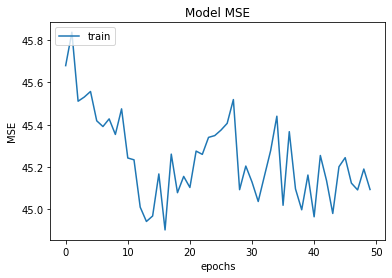

In [90]:
plt.plot(mse_total)
#plt.plot(history.history['val_loss'])
plt.title('Model MSE')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
mse_total

### From Part A - Mean of MSE and Std. Dev.

The mean MSE value is 50.59490996401415 and standard deviation for MSE is 1.0276902495212634

### For Part B - Mean of MSE and Std. Dev.

The mean MSE value is 46.317387506891215 and standard deviation for MSE is 0.17963278002251176

In [91]:
#Calculating mean and standard deviation of MSE - Part C
mean = np.mean(mse_total)
std_dev=np.std(mse_total)

print('The mean MSE value is {} and standard deviation for MSE is {}'.format(mean, std_dev))

The mean MSE value is 45.24129840451905 and standard deviation for MSE is 0.1993572807166656
